# 잡케어 추천 알고리즘 경진대회

구직자의 이력서를 인공지능 기술로 직무역량을 자동 분석하여 훈련, 자격, 일자리 상담에 활용할 수 있도록 지원하는 시스템이다.

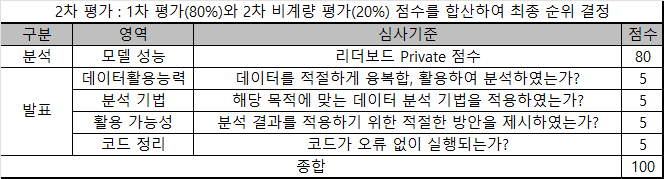

target 값은 회원들이 훈련, 자격, 일자리 등의 컨텐츠를 사용했는지에 대한 여부입니다.

> 컬럼

- Match 유형

회원 선호 속성과 컨텐츠 속성이 동일한지에 관한 여부를 나타냄 , 연산자 : 'Boolean' 연산자 사용

- person 유형
 
회원 속성값, 회원 선호 속성값 : 명목형과 순서형

- contents atrribute 유형

제공하는 콘텐츠의 속성을 나타냄 : 명목형, 순서형

- person_rn, contents_rn, contents_open_dt

- target 

컨텐츠 사용 여부, 명목형, Y: 회원이 컨텐츠를 사용함, N: 회원이 컨텐츠를 사용하지 않음

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

train= pd.read_csv('/content/drive/MyDrive/잡케어/train (5).csv')
test= pd.read_csv('/content/drive/MyDrive/잡케어/test (2).csv')

d_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_D_코드.csv', index_col=0).T.to_dict()
h_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_H_코드.csv', index_col=0).T.to_dict()
l_code= pd.read_csv('/content/drive/MyDrive/잡케어/속성_L_코드.csv', index_col=0).T.to_dict()

In [252]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [253]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [254]:
d_code #대, 세, 소, 중

{4: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 4, '속성 D 소분류코드': 3, '속성 D 중분류코드': 2},
 5: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 5, '속성 D 소분류코드': 3, '속성 D 중분류코드': 2},
 7: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 7, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 8: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 9: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 10: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 11: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 12: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 13: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 8, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 14: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 14, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 15: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 15, '속성 D 소분류코드': 6, '속성 D 중분류코드': 2},
 17: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 17, '속성 D 소분류코드': 16, '속성 D 중분류코드': 2},
 18: {'속성 D 대분류코드': 1, '속성 D 세분류코드': 18, '속성 D 소분류코드': 16, '속성 D 중분류코드': 2},
 19: {'속성 D 대분류코드': 1, '

In [255]:
h_code #대, 중

{2: {'속성 H 대분류코드': 1, '속성 H 중분류코드': 315},
 4: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 316},
 5: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 317},
 6: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 318},
 7: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 319},
 8: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 320},
 9: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 321},
 10: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 322},
 11: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 323},
 12: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 324},
 13: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 325},
 14: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 326},
 15: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 327},
 16: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 328},
 17: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 329},
 18: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 330},
 19: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 331},
 20: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 332},
 21: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 333},
 22: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 334},
 23: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 335},
 24: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 336},
 25: {'속성 H 대분류코드': 3, '속성 H 중분류코드': 337},
 26: {'속성 H 대분류코드'

In [256]:
l_code #대, 세, 소 중

{1: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 1, '속성 L 소분류코드': 1, '속성 L 중분류코드': 1},
 2: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 2, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 3: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 3, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 4: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 3, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 5: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 6: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 7: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 8: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 5, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 9: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 9, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 10: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 9, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 11: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 9, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 12: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 12, '속성 L 소분류코드': 2, '속성 L 중분류코드': 1},
 13: {'속성 L 대분류코드': 2004, '속성 L 세분류코드': 12, '속성 L 소분류코드': 2, '속성 L 중분류코드

##EDA

# applying D, H, L codes to df

In [257]:
#https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent 코드 사용
def add_code(df, d_code, h_code, l_code):

  #n : 세분류, s: 소분류, m: 중분류, l: 대분류
  df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
  df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
  df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
  df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

  # H Code
  df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
  df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
  df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

  df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
  df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 

  return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

In [258]:
#회원이 선호하는 속성과 제공된 컨텐츠의 속성이 동일한지에 대한 여부를 나타냄 > 연결이 잘 됨
train[['d_l_match_yn','person_prefer_d_1_l', 'contents_attribute_d_l']]

,d_l_match_yn,person_prefer_d_1_l,contents_attribute_d_l
0,True,216,216
1,False,1,216
2,False,377,1
3,False,618,216
4,True,216,216
...,...,...,...
501946,False,926,1
501947,True,1,1
501948,True,1,1
501949,True,1,1


# missing val checking

In [259]:
#결측치 확인
train.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
target                    0
person_prefer_d_1_n 

In [260]:
test.isna().sum()

id                        0
d_l_match_yn              0
d_m_match_yn              0
d_s_match_yn              0
h_l_match_yn              0
h_m_match_yn              0
h_s_match_yn              0
person_attribute_a        0
person_attribute_a_1      0
person_attribute_b        0
person_prefer_c           0
person_prefer_d_1         0
person_prefer_d_2         0
person_prefer_d_3         0
person_prefer_e           0
person_prefer_f           0
person_prefer_g           0
person_prefer_h_1         0
person_prefer_h_2         0
person_prefer_h_3         0
contents_attribute_i      0
contents_attribute_a      0
contents_attribute_j_1    0
contents_attribute_j      0
contents_attribute_c      0
contents_attribute_k      0
contents_attribute_l      0
contents_attribute_d      0
contents_attribute_m      0
contents_attribute_e      0
contents_attribute_h      0
person_rn                 0
contents_rn               0
contents_open_dt          0
person_prefer_d_1_n       0
person_prefer_d_1_s 

> Train DF : 결측치 없음
> Test DF : 결측치 없음

#Checking data types후 데이터 적절히 변환

- bool > mapping을 통해 0,1로 변환
- Datetime 데이터 

In [261]:
train_data= train.copy()
test_data= test.copy()

In [262]:
train_data.dtypes.value_counts()

int64     52
bool       6
object     1
dtype: int64

In [263]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381


> d_l_match_yn 부터 h_s_match_yn까지는 bool 연산자


In [264]:
# true> 1, false >0
#one hot encoding 적용 해 볼 수도,,?
def booltoint(df):
  df['d_l_match_yn']=df.d_l_match_yn.astype(int)
  df['d_m_match_yn']=df.d_m_match_yn.astype(int)
  df['d_s_match_yn']=df.d_s_match_yn.astype(int)
  df['h_l_match_yn']=df.h_l_match_yn.astype(int)
  df['h_m_match_yn']=df.h_m_match_yn.astype(int)
  df['h_s_match_yn']=df.h_s_match_yn.astype(int)

booltoint(train_data)
booltoint(test_data)

In [265]:
print(train_data.dtypes.value_counts())
print('------------------------------')
print(test_data.dtypes.value_counts())

#불리안(T,F)를 int type으로 변경

int64     58
object     1
dtype: int64
------------------------------
int64     57
object     1
dtype: int64


> contents_open_dt 는 object type 변수이기 때문에, 새로운 컬럼으로 변환시켜주기


In [266]:
train_data.dtypes
#contents_open_dt

id                         int64
d_l_match_yn               int64
d_m_match_yn               int64
d_s_match_yn               int64
h_l_match_yn               int64
h_m_match_yn               int64
h_s_match_yn               int64
person_attribute_a         int64
person_attribute_a_1       int64
person_attribute_b         int64
person_prefer_c            int64
person_prefer_d_1          int64
person_prefer_d_2          int64
person_prefer_d_3          int64
person_prefer_e            int64
person_prefer_f            int64
person_prefer_g            int64
person_prefer_h_1          int64
person_prefer_h_2          int64
person_prefer_h_3          int64
contents_attribute_i       int64
contents_attribute_a       int64
contents_attribute_j_1     int64
contents_attribute_j       int64
contents_attribute_c       int64
contents_attribute_k       int64
contents_attribute_l       int64
contents_attribute_d       int64
contents_attribute_m       int64
contents_attribute_e       int64
contents_a

In [267]:
#convert to dt
train_data['contents_open_dt']
#yyyy-mm-dd hh:mm:ss

#train
train_data['contents_open_dt']= pd.to_datetime(train_data.contents_open_dt, format='%Y-%m-%d %H:%M:%S')

train_data['contents_open_dt_year']= train_data['contents_open_dt'].dt.year.astype(int)
train_data['contents_open_dt_month']=train_data['contents_open_dt'].dt.month.astype(int)
train_data['contents_open_dt_day']=train_data['contents_open_dt'].dt.day.astype(int)
train_data['contents_open_dt_hour']=train_data['contents_open_dt'].dt.hour.astype(int)
train_data['contents_open_dt_minute']=train_data['contents_open_dt'].dt.minute.astype(int)
train_data['contents_open_dt_sec']= train_data['contents_open_dt'].dt.second.astype(int)

#train_data[['contents_open_dt','contents_open_dt_year','contents_open_dt_month','contents_open_dt_day','contents_open_dt_hour','contents_open_dt_minute','contents_open_dt_sec']]
#test_data[['contents_open_dt','contents_open_dt_year','contents_open_dt_month','contents_open_dt_day','contents_open_dt_hour','contents_open_dt_minute','contents_open_dt_sec']]

#test
test_data['contents_open_dt']= pd.to_datetime(test_data.contents_open_dt, format='%Y-%m-%d %H:%M:%S')

test_data['contents_open_dt_year']= test_data['contents_open_dt'].dt.year.astype(int)
test_data['contents_open_dt_month']=test_data['contents_open_dt'].dt.month.astype(int)
test_data['contents_open_dt_day']=test_data['contents_open_dt'].dt.day.astype(int)
test_data['contents_open_dt_hour']=test_data['contents_open_dt'].dt.hour.astype(int)
test_data['contents_open_dt_minute']=test_data['contents_open_dt'].dt.minute.astype(int)
test_data['contents_open_dt_sec']= test_data['contents_open_dt'].dt.second.astype(int)

In [268]:
train_data.drop('contents_open_dt',axis=1, inplace=True)
test_data.drop('contents_open_dt',axis=1, inplace=True)

In [269]:
# 간단히 eda 마친 DF 로 모델 피팅 진행

# train_data.to_csv('/content/drive/MyDrive/잡케어/train_data.csv')
# test_data.to_csv('/content/drive/MyDrive/잡케어/test_data.csv')

--------------

0109

# 데이터 각 컬럼 뜯어보기

In [270]:
train_data

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_year,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,2020,1,17,12,9,36
1,1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,2020,6,18,17,48,52
2,2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,2020,7,8,20,0,10
3,3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,2020,1,13,18,9,34
4,4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,2020,3,9,20,39,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,0,0,0,1,0,0,1,1,2,2,1192,935,1228,3,1,1,59,4,95,3,3,5,1,1,2,354,147,1,5,65,503156,285850,1,1192,1180,1169,926,929,928,927,926,1227,1227,1227,926,145,123,56,1,58,368,3,316,94,398,58,373,2020,3,13,12,55,52
501947,501947,1,1,0,1,0,0,1,6,2,1,118,113,110,4,1,1,105,142,95,3,3,10,2,1,2,163,120,1,4,142,676255,456996,1,114,109,56,1,110,109,56,1,110,109,56,1,114,109,56,1,94,401,94,425,94,398,94,425,2020,1,20,11,51,51
501948,501948,1,1,1,1,0,0,1,7,4,1,147,46,145,4,1,1,59,127,139,3,1,5,1,1,2,438,147,2,7,65,484528,293258,1,145,123,56,1,46,43,2,1,145,123,56,1,145,123,56,1,58,368,94,413,94,422,58,373,2020,8,5,17,27,24
501949,501949,1,0,0,1,0,0,1,1,2,1,46,147,145,4,1,1,251,49,258,3,2,5,1,1,2,660,147,3,4,259,456330,273797,1,46,43,2,1,145,123,56,1,145,123,56,1,145,123,56,1,250,518,48,359,250,523,250,524,2020,6,15,9,23,21


In [271]:
train_data['id'].duplicated().value_counts()

False    501951
Name: id, dtype: int64

> id는 target과의 연관성이 없다고 생각하여 drop

In [272]:
#dropping id on both train, test

#train
train_data.drop('id',axis=1, inplace=True)

#test
test_data.drop('id', axis=1, inplace=True)

#큰 heatmap부터 조회

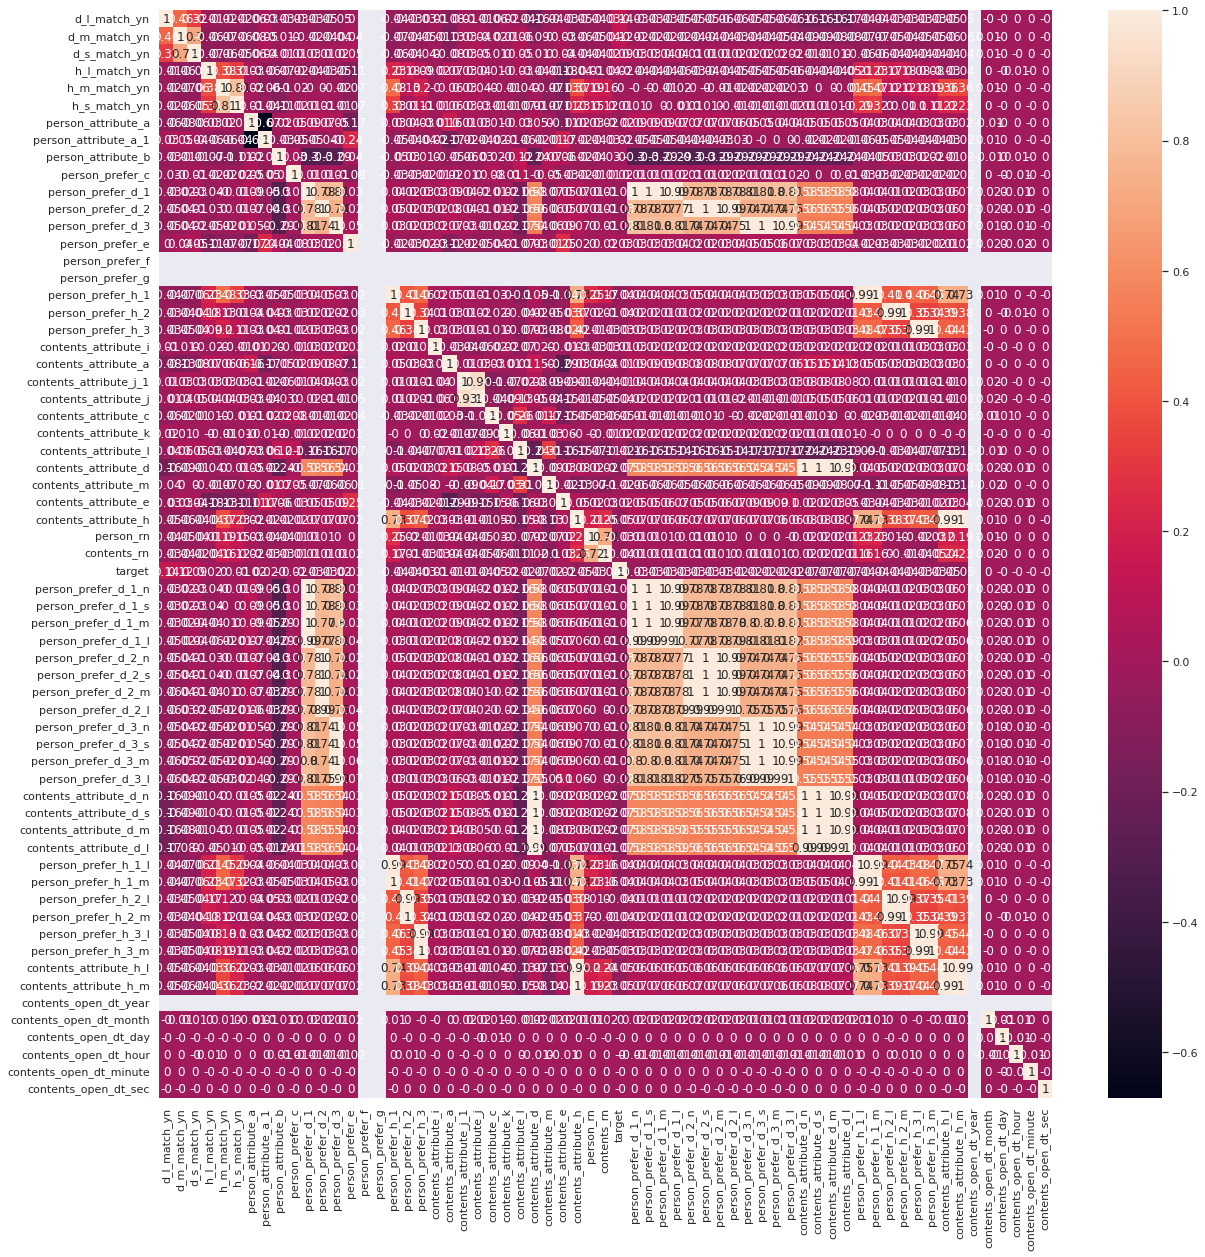

In [273]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(round(train_data.corr(),2),annot=True)

In [274]:
target_corr= train_data.corr()['target'].sort_values()

In [275]:
target_corr.head()

contents_attribute_d_l   -0.072809
contents_attribute_d_m   -0.071532
contents_attribute_d_s   -0.069434
contents_attribute_d_n   -0.069355
contents_attribute_d     -0.069321
Name: target, dtype: float64

In [276]:
target_corr.tail()

d_l_match_yn             0.14267
target                   1.00000
person_prefer_f              NaN
person_prefer_g              NaN
contents_open_dt_year        NaN
Name: target, dtype: float64

#dropping some cols( f, g, year)

In [277]:
print(train_data.person_prefer_f.unique()) 
print(train_data.person_prefer_g.unique()) 
print(train_data.contents_open_dt_year.unique())
#person_prefer_f, person_prefer_g 는 1이라는 값만 가짐 > 의미 x
# year은 2020만 나오기 때문에 의미 x

# 이 세 col은 drop 하기

[1]
[1]
[2020]


In [278]:
#train, test drop
def droppings(df):
  df.drop('person_prefer_f',axis=1,inplace=True)
  df.drop('person_prefer_g',axis=1, inplace=True)
  df.drop('contents_open_dt_year',axis=1,inplace=True)

droppings(train_data)
droppings(test_data)

In [279]:
target_corr= train_data.corr()['target'].sort_values()

In [280]:
target_corr.tail() #target과의 corr이 왜이렇게 낮게 나오는걸까?

person_prefer_e    0.032915
d_s_match_yn       0.087591
d_m_match_yn       0.118406
d_l_match_yn       0.142670
target             1.000000
Name: target, dtype: float64

column이 크게 세 분류로 나눠짐
1. Match
2. Person Attribute
3. Contents Attribute

#1. Match 컬럼부터 확인해보기

- d_l_match_yn : 회원 선호 속성 D 1번 대분류코드와 컨텐츠 속성 D 대분류코드가 동일한지에 대한 여부
- d_m_match_yn : 회원 선호 속성 D 1번 세분류코드와 컨텐츠 속성 D 세분류코드가 동일한지에 대한 여부
- d_s_match_yn : 회원 선호 속성 D 1번 코드와 컨텐츠 속성 D 코드가 동일한지에 대한 여부
-	h_l_match_yn: 회원 선호 속성 H 1번 대분류코드와 컨텐츠 속성 H 대분류코드가 동일한지에 대한 여부
-	h_m_match_yn : 회원 선호 속성 H 1번 중분류코드와 컨텐츠 속성 H 중분류코드가 동일한지에 대한 여부
-	h_s_match_yn : 회원 선호 속성 H 1번 코드와 컨텐츠 속성 H 코드가 동일한지에 대한 여부

In [281]:
train_data.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1,17,12,9,36
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,6,18,17,48,52
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,7,8,20,0,10
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1,13,18,9,34
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,3,9,20,39,22


In [282]:
for i in range(5):
  print(train_data.iloc[:,i].value_counts())

1    315268
0    186683
Name: d_l_match_yn, dtype: int64
0    368324
1    133627
Name: d_m_match_yn, dtype: int64
0    426694
1     75257
Name: d_s_match_yn, dtype: int64
1    399338
0    102613
Name: h_l_match_yn, dtype: int64
0    318818
1    183133
Name: h_m_match_yn, dtype: int64


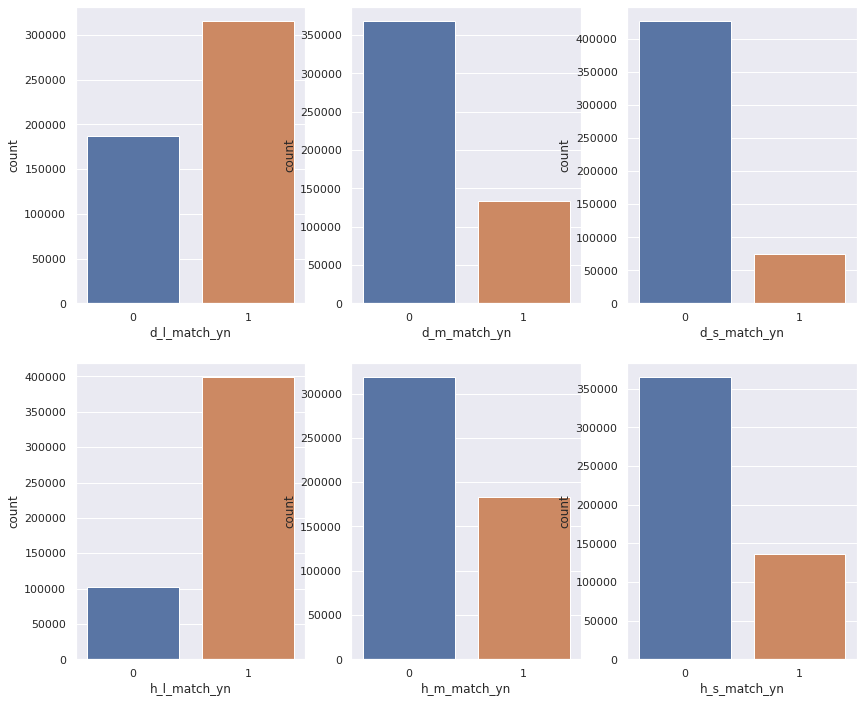

In [283]:
fig = plt.figure(figsize=(14,12))

plt.subplot(231)
sns.countplot(data = train_data, x='d_l_match_yn')
plt.subplot(232)
sns.countplot(data= train_data,x='d_m_match_yn')
plt.subplot(233)
sns.countplot(data= train_data,x='d_s_match_yn')
plt.subplot(234)
sns.countplot(data= train_data,x='h_l_match_yn')
plt.subplot(235)
sns.countplot(data= train_data,x='h_m_match_yn')
plt.subplot(236)
sns.countplot(data= train_data,x='h_s_match_yn')

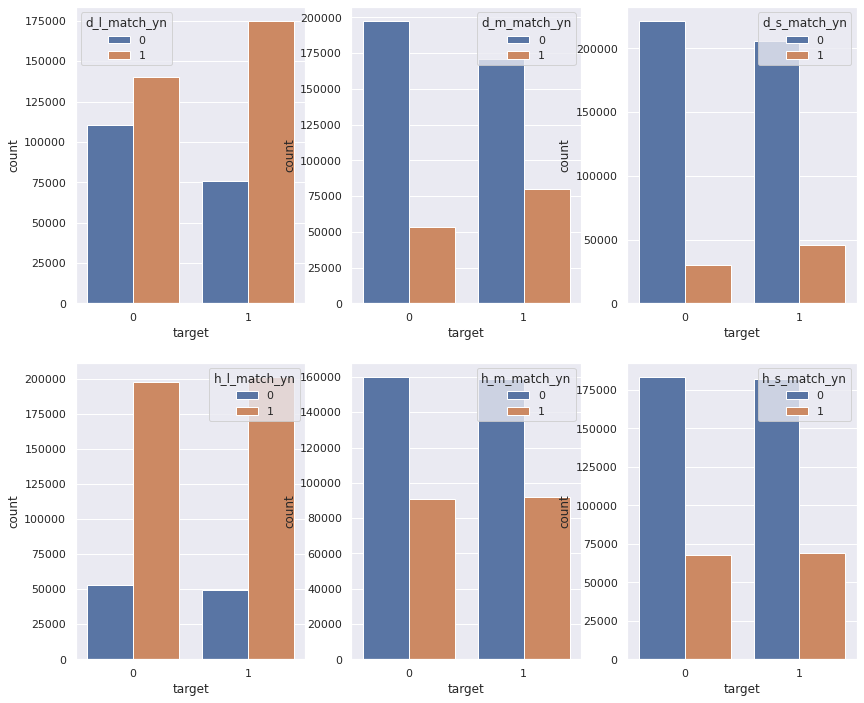

In [284]:
fig = plt.figure(figsize=(14,12))

plt.subplot(231)
sns.countplot(data = train_data, hue='d_l_match_yn',x='target')
plt.subplot(232)
sns.countplot(data= train_data,hue='d_m_match_yn',x='target')
plt.subplot(233)
sns.countplot(data= train_data,hue='d_s_match_yn',x='target')
plt.subplot(234)
sns.countplot(data= train_data,hue='h_l_match_yn',x='target')
plt.subplot(235)
sns.countplot(data= train_data,hue='h_m_match_yn',x='target')
plt.subplot(236)
sns.countplot(data= train_data,hue='h_s_match_yn',x='target')

Match : 내가 선호하는 속성 = 제공 콘텐츠의 속성

> 가설: Match의 1값이 많을수록 target의 1이 높을 것이다

내가 선호하는 속성이 제공 콘텐츠의 속성과 맞으면, 해당 콘텐츠를 활용할 가능성이 높다고 생각



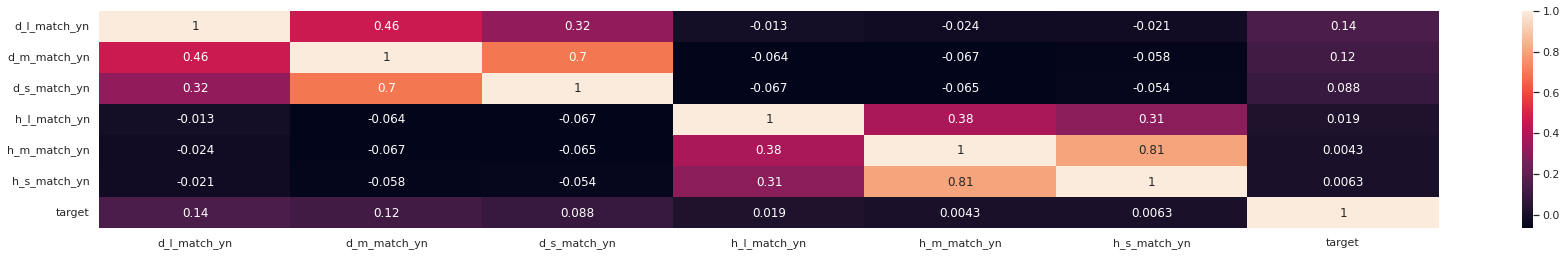

In [285]:
match_df=train_data[['d_l_match_yn','d_m_match_yn','d_s_match_yn','h_l_match_yn','h_m_match_yn','h_s_match_yn','target']]
sns.heatmap(match_df.corr(),annot=True)

#target과는 corr점수가 낮게 나오는데 d들끼리, h들끼리는 높은 상관관계를 띄고 있다, > 다중공선성 의심?

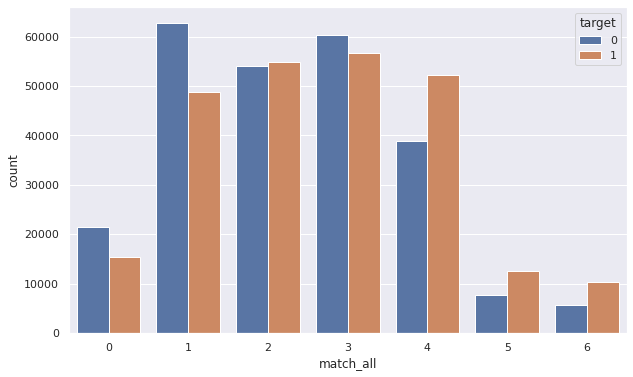

In [286]:
#일치하는 횟수가 높을 수록 target에 영향을 미칠까?
train_data['match_all']=  train_data['d_l_match_yn']+ train_data['d_m_match_yn']+ train_data['d_s_match_yn'] + train_data['h_l_match_yn']+ train_data['h_m_match_yn']+ train_data['h_s_match_yn']

# train_data[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn','h_m_match_yn', 'h_s_match_yn','match_all']]
fig = plt.figure(figsize=(10,6))
sns.countplot(data= train_data,hue='target',x='match_all')

#matching의 갯수가 적을 수로 0인 경우가 많고, matching이 많을수록 1인 경우가 많음

In [287]:
#일단은 drop하고 나중에 add 할지 고민
train_data.drop('match_all',axis=1, inplace=True)

In [288]:
train_data.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1,17,12,9,36
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,6,18,17,48,52
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,7,8,20,0,10
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1,13,18,9,34
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,3,9,20,39,22


# Person columns

> person_attribute a, a_1, b

>person prefer d_1,d_2, d_3, c, e, f, g, h_1, h_2, h_3

In [289]:
#person attribute
train_data[['person_attribute_a','person_attribute_a_1', 'person_attribute_b']]

,person_attribute_a,person_attribute_a_1,person_attribute_b
0,1,4,3
1,1,3,4
2,2,0,3
3,2,0,2
4,1,3,4
...,...,...,...
501946,1,1,2
501947,1,6,2
501948,1,7,4
501949,1,1,2


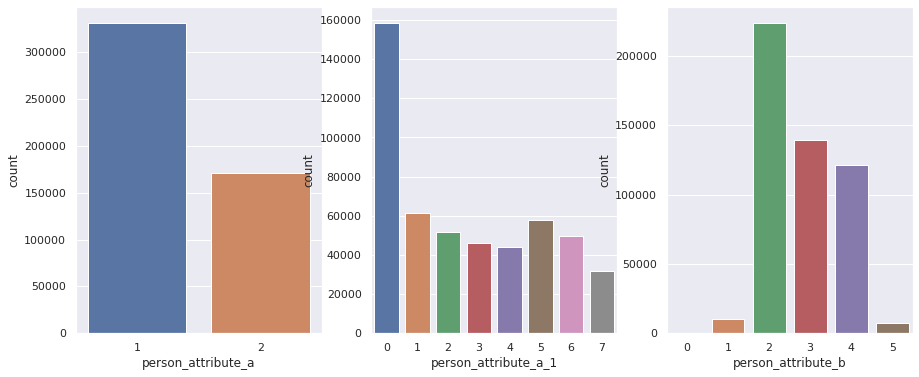

In [290]:
fig = plt.figure(figsize=(15,6))

plt.subplot(131)
sns.countplot(data = train_data, x='person_attribute_a')
plt.subplot(132)
sns.countplot(data= train_data,x='person_attribute_a_1')
plt.subplot(133)
sns.countplot(data= train_data,x='person_attribute_b')

- person_attribute_a : 1>2 (maybe 성별)
- person_attribute_a_1 : 0>>>>1,5,6,
- person attribute_b : 2>>3>4>1=5>0

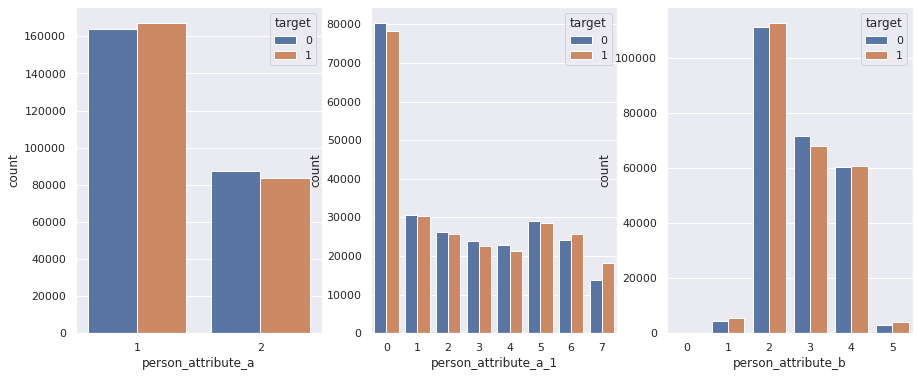

In [291]:
fig = plt.figure(figsize=(15,6))

plt.subplot(131)
sns.countplot(data = train_data, x='person_attribute_a',hue='target')
plt.subplot(132)
sns.countplot(data= train_data,x='person_attribute_a_1',hue='target')
plt.subplot(133)
sns.countplot(data= train_data,x='person_attribute_b',hue='target')

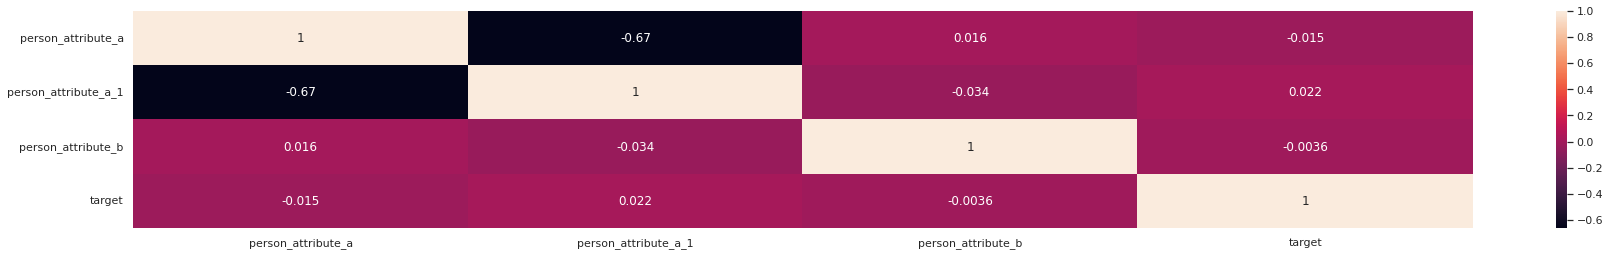

In [292]:
attributes_cor= train[['person_attribute_a','person_attribute_a_1', 'person_attribute_b','target']]
sns.heatmap(attributes_cor.corr(),annot=True)
#a, a_1이 상관관계가 높아보임

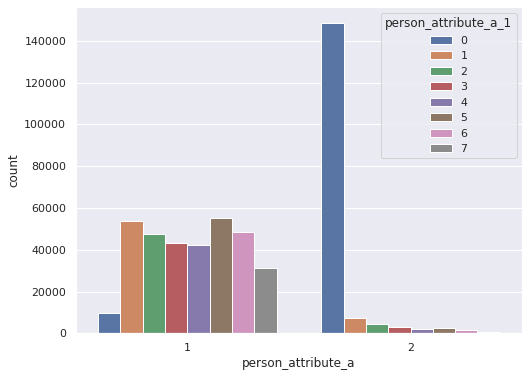

In [293]:
#a_1, a > 
fit= plt.figure(figsize=(8,6))
sns.countplot(data = train_data, hue='person_attribute_a_1',x='person_attribute_a')

#ex) a > 신입, 경력 , a_1> 희망 연봉등,,,

> 기본적으로 a_1의 0 값이 많음. but a가 1일때의 a_1은 0이 적고, a가 2일때의 a_1의 0값이 많다

> Person Prefer Data

In [294]:
person_prefer_df= train_data[['person_prefer_c',
       'person_prefer_d_1','person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2','person_prefer_d_2_n', 'person_prefer_d_2_s','person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3','person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l',
       'person_prefer_e', 
       'person_prefer_h_1','person_prefer_h_1_l', 'person_prefer_h_1_m', 
       'person_prefer_h_2', 'person_prefer_h_2_l', 'person_prefer_h_2_m',
       'person_prefer_h_3','person_prefer_h_3_l', 'person_prefer_h_3_m',
       'target']]

In [295]:
person_prefer_df.head()

,person_prefer_c,person_prefer_d_1,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,person_prefer_e,person_prefer_h_1,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3,person_prefer_h_3_l,person_prefer_h_3_m,target
0,5,275,275,274,274,216,370,369,368,297,216,369,369,368,297,216,8,4,3,316,95,94,398,59,58,368,1
1,1,114,114,109,56,1,181,175,152,56,1,175,175,152,56,1,4,131,94,417,101,94,400,96,94,399,0
2,5,464,464,463,450,377,175,175,152,56,1,452,452,451,450,377,3,54,48,364,263,250,528,56,48,366,0
3,5,703,703,703,690,618,705,703,703,690,618,704,703,703,690,618,3,72,71,379,227,226,495,2,1,315,0
4,5,275,275,274,274,216,370,369,368,297,216,369,369,368,297,216,4,214,208,483,210,208,481,209,208,480,0


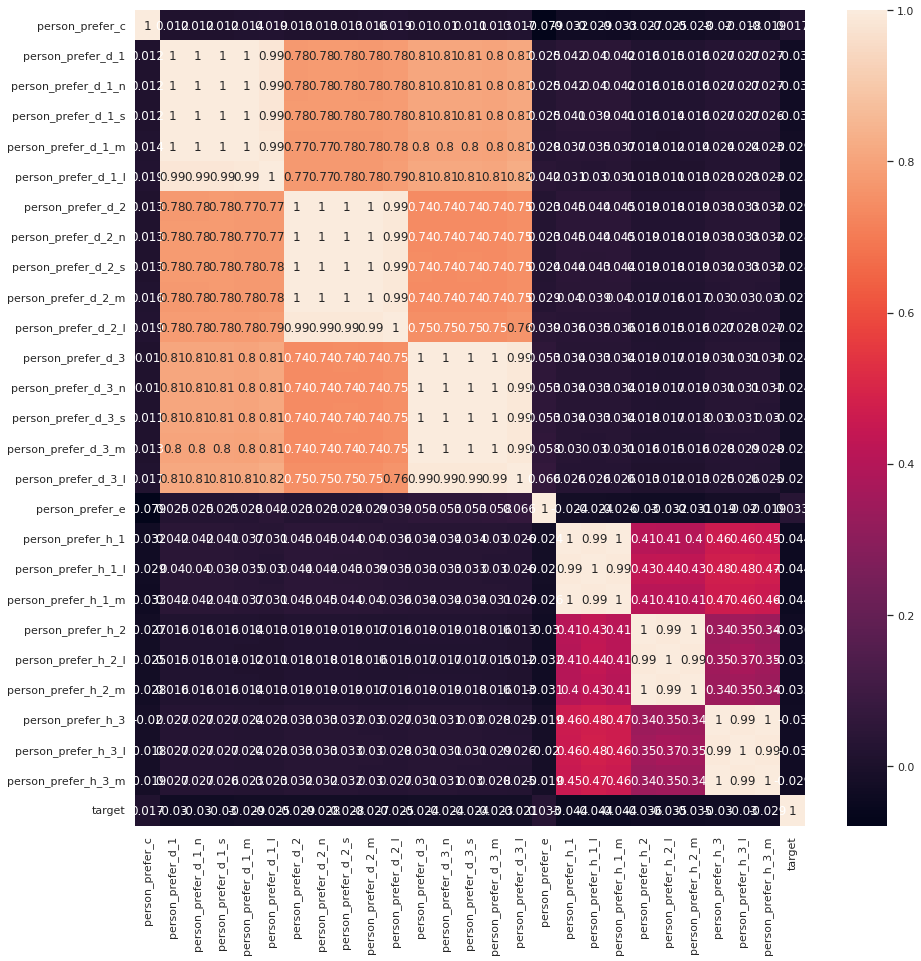

In [296]:
fit= plt.figure(figsize=(15,15))
sns.heatmap(person_prefer_df.corr(),annot=True)

> D

D 변수들 사이에 강한 상관성을 띄고 있음을 확인할 수 있다. 특히 d_i와 d_i_l, d_i_m, d_i_s, d_i_m 사이에서 상관성 높게 띔.

>H

H 변수들 또한 H변수들끼리 강한 상관성을 띄고 있음. 특히 같은 번호끼리의 상관계수가 높음

어떤 변수들을 drop해야 다중공선성 down, 상관계수 up될까?

#person_prefer_d

In [297]:
train_data.columns
#d칼럼 총 15개

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_

In [298]:
d_cols=train_data[['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
                  'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
                  'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
                  'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
                  'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l']]

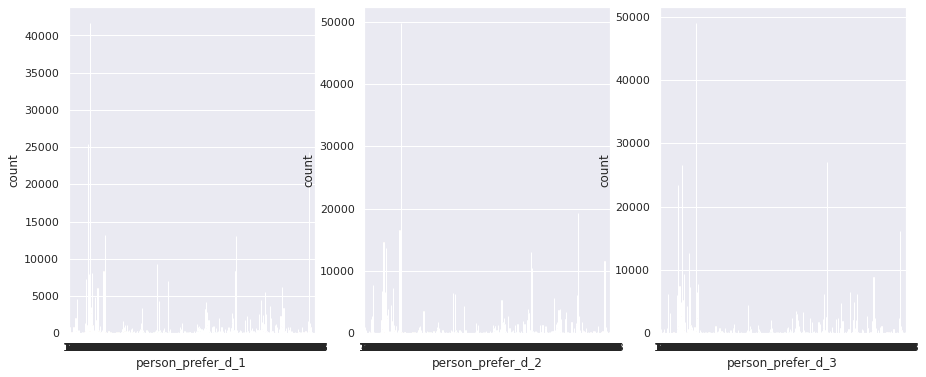

In [299]:
fig = plt.figure(figsize=(15,6))

plt.subplot(131)
sns.countplot(data = train_data, x='person_prefer_d_1')
plt.subplot(132)
sns.countplot(data= train_data,x='person_prefer_d_2')
plt.subplot(133)
sns.countplot(data= train_data,x='person_prefer_d_3')

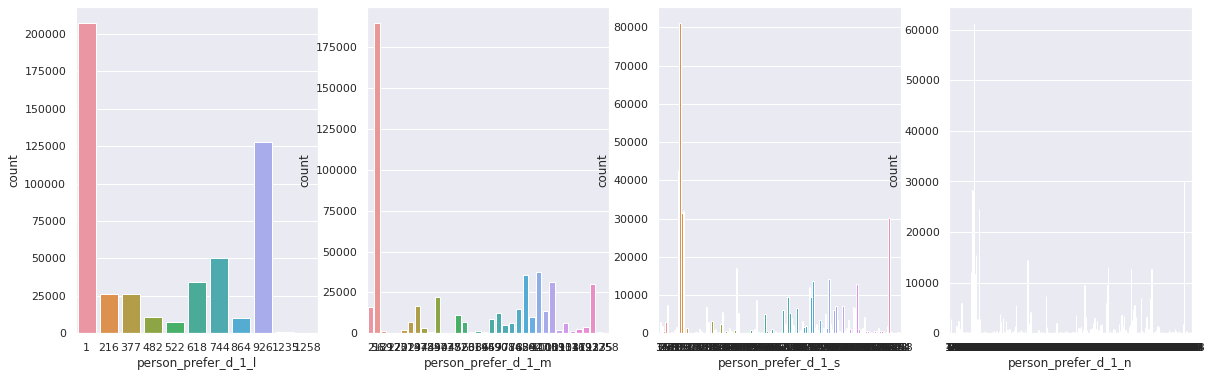

In [300]:
fig = plt.figure(figsize=(20,6))
plt.subplot(141)
sns.countplot(data = train_data, x='person_prefer_d_1_l')
plt.subplot(142)
sns.countplot(data= train_data,x='person_prefer_d_1_m')
plt.subplot(143)
sns.countplot(data= train_data,x='person_prefer_d_1_s')
plt.subplot(144)
sns.countplot(data= train_data,x='person_prefer_d_1_n')

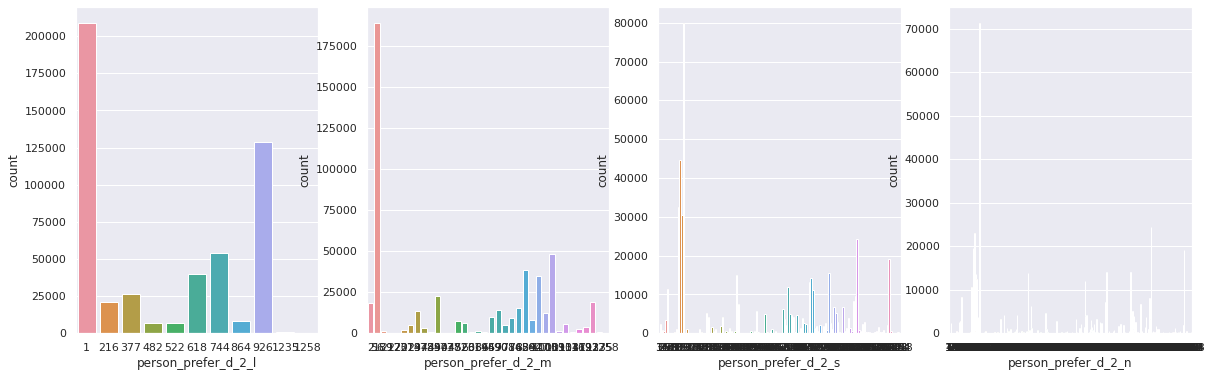

In [301]:
fig = plt.figure(figsize=(20,6))
plt.subplot(141)
sns.countplot(data = train_data, x='person_prefer_d_2_l')
plt.subplot(142)
sns.countplot(data= train_data,x='person_prefer_d_2_m')
plt.subplot(143)
sns.countplot(data= train_data,x='person_prefer_d_2_s')
plt.subplot(144)
sns.countplot(data= train_data,x='person_prefer_d_2_n')

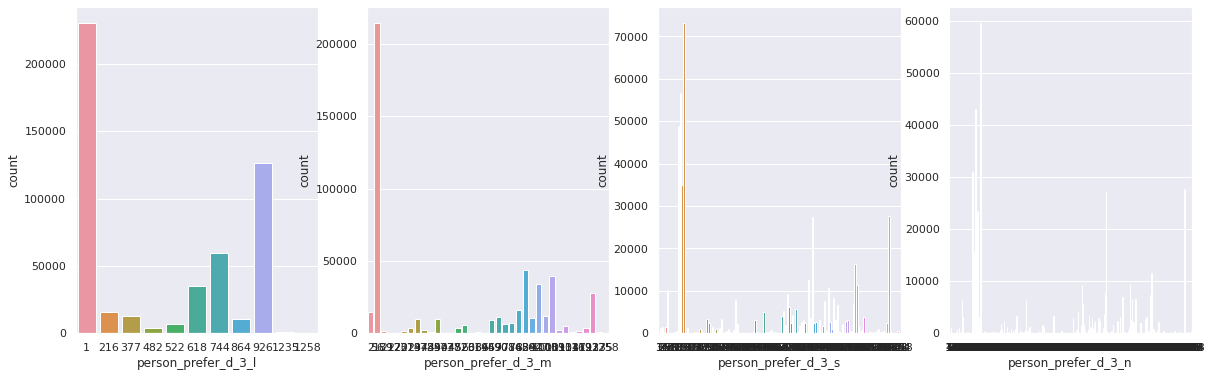

In [302]:
fig = plt.figure(figsize=(20,6))
plt.subplot(141)
sns.countplot(data = train_data, x='person_prefer_d_3_l')
plt.subplot(142)
sns.countplot(data= train_data,x='person_prefer_d_3_m')
plt.subplot(143)
sns.countplot(data= train_data,x='person_prefer_d_3_s')
plt.subplot(144)
sns.countplot(data= train_data,x='person_prefer_d_3_n')

> n을 제외한 나머지 l,m,s는 번호(1,2,3) 상관없이 비슷한 형태의 분포를 따른다?

In [303]:
for i in d_cols.columns:
  print(i , ': \n' , d_cols[i].value_counts().sort_values(ascending=False)[:10])

person_prefer_d_1 : 
 114     41720
102     25470
1227    24337
181     13213
857     13059
452      9323
851      8389
175      8384
122      8063
110      7944
Name: person_prefer_d_1, dtype: int64
person_prefer_d_2 : 
 181     49859
1086    19260
175     16558
102     14693
113     13769
851     13041
1227    11638
114     10597
857     10429
46       7775
Name: person_prefer_d_2, dtype: int64
person_prefer_d_3 : 
 175     49049
857     27014
114     26647
95      23355
1227    16177
145     12688
122      9331
1085     8963
1228     8877
1086     7810
Name: person_prefer_d_3, dtype: int64
person_prefer_d_1_n : 
 114     61374
1227    30041
101     28238
175     24567
110     19855
145     15539
452     14526
854     13180
1086    12797
968     12652
Name: person_prefer_d_1_n, dtype: int64
person_prefer_d_1_s : 
 109     81229
91      42575
152     31945
123     31478
1227    30041
451     17057
961     14308
853     13765
1086    12797
831     12032
Name: person_prefer_d_1_s, dtype

> 일단 d 패스, 나머지 보고 다시 돌아오기

#person_prefer_h

In [304]:
h_cols= train_data[['person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3' ,'person_prefer_h_1_l', 'person_prefer_h_1_m', 'person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3_l', 'person_prefer_h_3_m']]

In [305]:
h_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   person_prefer_h_1    501951 non-null  int64
 1   person_prefer_h_2    501951 non-null  int64
 2   person_prefer_h_3    501951 non-null  int64
 3   person_prefer_h_1_l  501951 non-null  int64
 4   person_prefer_h_1_m  501951 non-null  int64
 5   person_prefer_h_2_l  501951 non-null  int64
 6   person_prefer_h_2_m  501951 non-null  int64
 7   person_prefer_h_3_l  501951 non-null  int64
 8   person_prefer_h_3_m  501951 non-null  int64
dtypes: int64(9)
memory usage: 34.5 MB


In [306]:
h_cols.describe()

,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000
mean,116.394919,136.011991,122.784720,107.442511,409.648802,127.984672,425.593183,114.940871,415.585240
std,91.032989,93.756209,90.947916,90.275804,72.488959,95.013225,74.960942,90.862183,72.397541
min,2.000000,2.000000,2.000000,1.000000,315.000000,1.000000,315.000000,1.000000,315.000000
25%,44.000000,59.000000,59.000000,30.000000,355.000000,58.000000,368.000000,58.000000,368.000000
50%,95.000000,116.000000,95.000000,94.000000,398.000000,94.000000,407.000000,94.000000,398.000000
75%,189.000000,227.000000,200.000000,188.000000,463.000000,226.000000,495.000000,188.000000,472.000000
max,313.000000,313.000000,313.000000,312.000000,569.000000,312.000000,569.000000,312.000000,569.000000


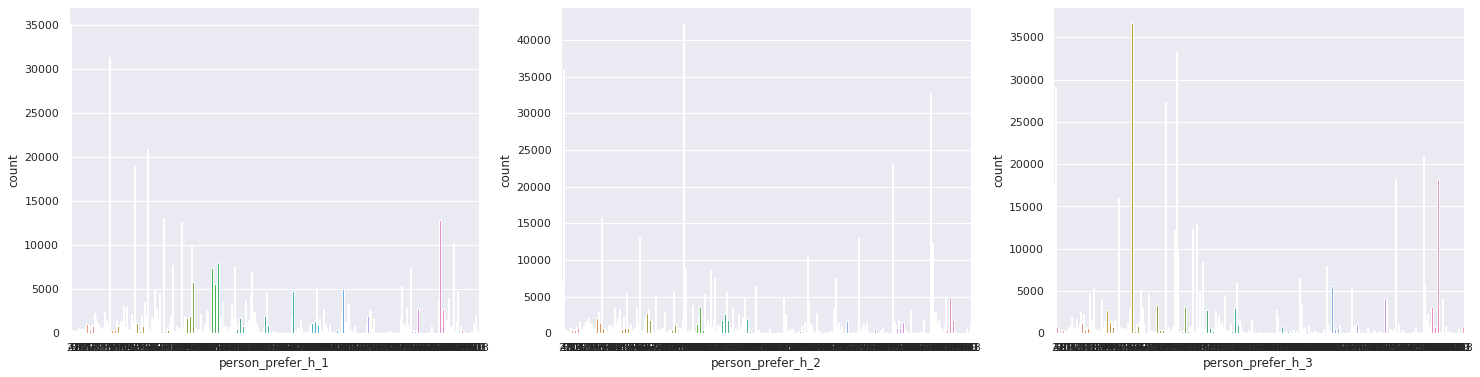

In [307]:
fig = plt.figure(figsize=(25,6))

plt.subplot(131)
sns.countplot(data = train_data, x='person_prefer_h_1')
plt.subplot(132)
sns.countplot(data= train_data,x='person_prefer_h_2')
plt.subplot(133)
sns.countplot(data= train_data,x='person_prefer_h_3')

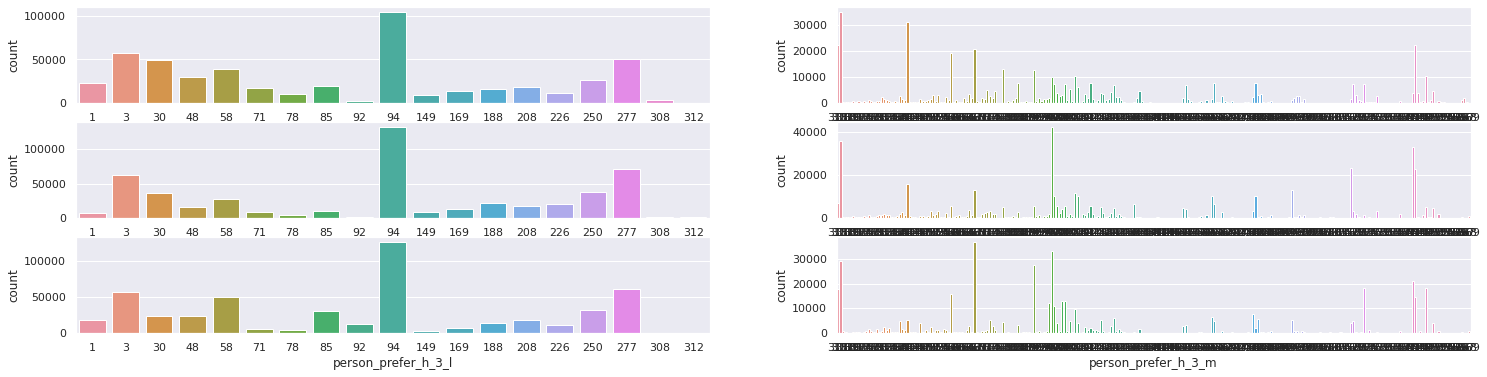

In [308]:
fig = plt.figure(figsize=(25,6))

plt.subplot(321)
sns.countplot(data = train_data, x='person_prefer_h_1_l')
plt.subplot(322)
sns.countplot(data= train_data,x='person_prefer_h_1_m')
plt.subplot(323)
sns.countplot(data= train_data,x='person_prefer_h_2_l')
plt.subplot(324)
sns.countplot(data= train_data,x='person_prefer_h_2_m')
plt.subplot(325)
sns.countplot(data= train_data,x='person_prefer_h_3_l')
plt.subplot(326)
sns.countplot(data= train_data,x='person_prefer_h_3_m')

In [309]:
print('h_1_l unique 갯수: ', len(train_data.person_prefer_h_1_l.unique()))
print('h_2_l unique 갯수: ', len(train_data.person_prefer_h_2_l.unique()))
print('h_3_l unique 갯수: ', len(train_data.person_prefer_h_3_l.unique()))

print('h_1_m unique 갯수: ', len(train_data.person_prefer_h_1_m.unique()))
print('h_2_m unique 갯수: ', len(train_data.person_prefer_h_2_m.unique()))
print('h_3_m unique 갯수: ', len(train_data.person_prefer_h_3_m.unique()))
#l은 l대로, m은m대로 분포 비슷해보임

h_1_l unique 갯수:  19
h_2_l unique 갯수:  19
h_3_l unique 갯수:  19
h_1_m unique 갯수:  246
h_2_m unique 갯수:  246
h_3_m unique 갯수:  246


In [310]:
for i in h_cols.columns:
  print(i , ': \n' , h_cols[i].value_counts().sort_values(ascending=False)[:10])

person_prefer_h_1 : 
 4      35257
31     31393
2      22458
59     20938
49     19155
72     13124
279    12853
86     12664
288    10256
95      9899
Name: person_prefer_h_1, dtype: int64
person_prefer_h_2 : 
 95     42383
4      36033
278    32846
251    23068
31     15713
59     13137
227    13033
279    12518
189    10346
116     8825
Name: person_prefer_h_2, dtype: int64
person_prefer_h_3 : 
 59     36745
95     33260
4      29087
86     27323
278    21123
258    18309
288    18249
2      17665
49     15965
109    12885
Name: person_prefer_h_3, dtype: int64
person_prefer_h_1_l : 
 94     104841
3       57367
277     50147
30      49806
58      39580
48      29714
250     26399
1       22458
85      19092
208     18482
Name: person_prefer_h_1_l, dtype: int64
person_prefer_h_1_m : 
 316    35257
342    31393
315    22458
543    22381
368    20938
359    19155
379    13124
391    12664
407    10619
547    10256
Name: person_prefer_h_1_m, dtype: int64
person_prefer_h_2_l : 
 94     1

D랑 H 나중에 다시 보기

#person prefer c

In [311]:
train_data.person_prefer_c.value_counts()

1    304571
5    156688
2     20223
3     15665
4      4804
Name: person_prefer_c, dtype: int64

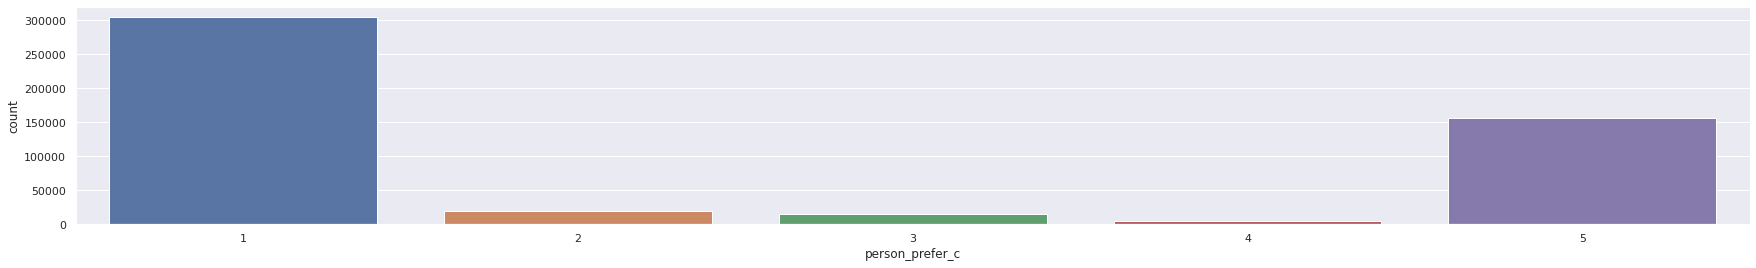

In [312]:
sns.countplot(train_data.person_prefer_c)

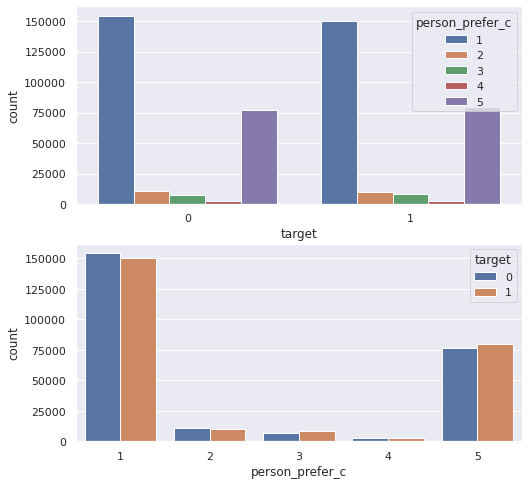

In [313]:
plt.figure(figsize=(8,8))

plt.subplot(211)
sns.countplot(data = train_data, hue='person_prefer_c',x='target')

plt.subplot(212)
sns.countplot(data = train_data, x='person_prefer_c',hue='target')

In [314]:
train_data[['person_prefer_c','person_prefer_e','target']].corr()

,person_prefer_c,person_prefer_e,target
person_prefer_c,1.000000,-0.079387,0.016768
person_prefer_e,-0.079387,1.000000,0.032915
target,0.016768,0.032915,1.000000


> 플롯으로부터 person_prefer_c와 target사이의 유의한 상관성이3 보이지 않는다. corr 점수도 낮음

#person_prefer_e


In [315]:
print('person_prefer_e의 unique 갯수 : ', len(train_data.person_prefer_e.unique()), '\n','value counts')
train_data.person_prefer_e.value_counts().sort_index()

person_prefer_e의 unique 갯수 :  12 
 value counts


0      66676
1        366
2       2323
3     139683
4     160100
5      81635
6      31407
7       8641
8       6259
9       1473
10      1936
11      1452
Name: person_prefer_e, dtype: int64

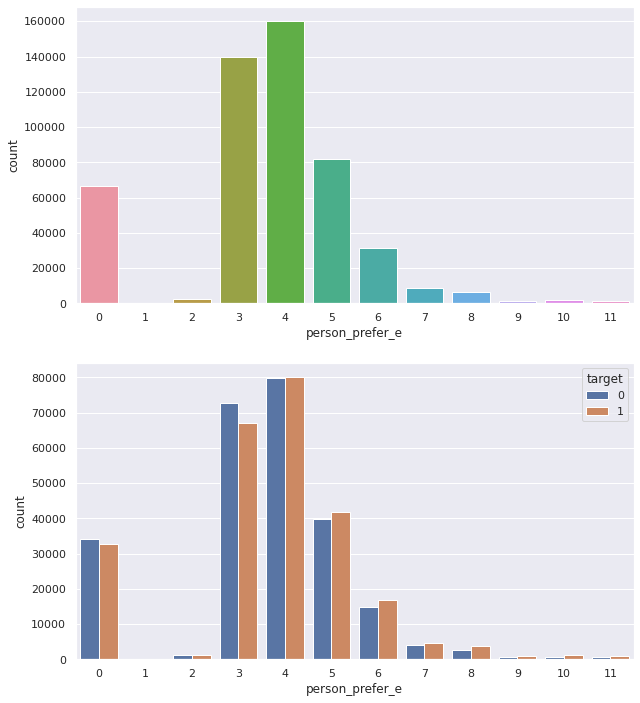

In [316]:
plt.figure(figsize=(10,12))
plt.subplot(211)
sns.countplot(train_data.person_prefer_e)

plt.subplot(212)
sns.countplot(data=train_data, x='person_prefer_e', hue='target')

# plt.subplot(313)
# sns.countplot(data=train_data, hue='person_prefer_e', x='target')

> 회원 선호속성 e가 3인경우 0>1 (콘텐츠 이용 x)

> 회원 선호속성 e가 5인경우 0<1 (콘텐츠 이용 o)

이지만 큰 차이는 없어보임. 상관관계 역시 낮게 나옴

# Contents Attribute

In [317]:
train_data.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_

In [318]:
contents_col=train_data[['contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e','contents_attribute_h',
       'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d_m', 'contents_attribute_d_l','contents_attribute_h_l', 'contents_attribute_h_m','target']]

contents_col.head()

,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,contents_attribute_h_l,contents_attribute_h_m,target
0,3,3,10,2,1,2,1608,275,1,4,139,275,274,274,216,94,422,1
1,1,3,5,1,1,2,1608,275,1,4,133,275,274,274,216,94,417,0
2,3,1,10,2,1,1,1600,94,1,4,53,92,91,56,1,48,363,0
3,1,3,5,1,1,2,1608,275,5,3,74,275,274,274,216,71,381,0
4,1,1,10,2,1,2,1608,275,1,4,74,275,274,274,216,71,381,0


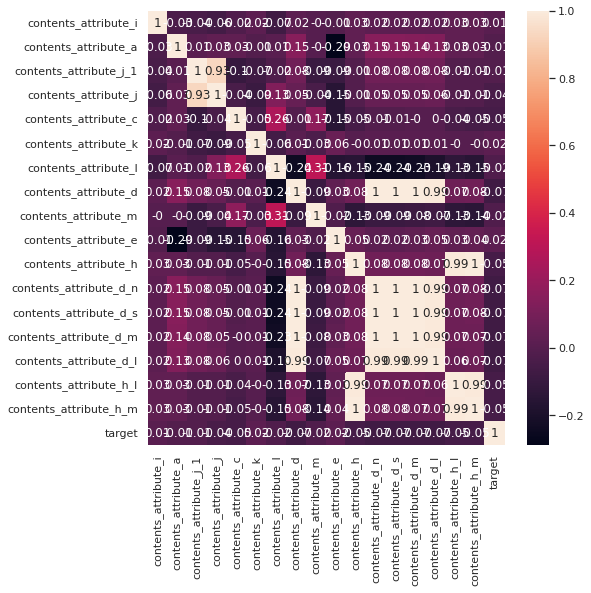

In [319]:
plt.figure(figsize=(8,8))
sns.heatmap(round(contents_col.corr(),2), annot=True)
#하위 속성들끼리는 상관관계가 높아보임(j, j_1), (d, d_l,d_n,d_m,d_s)

In [320]:
for col in contents_col:
  print(col,'의 unique 갯수 : ', len(contents_col[col].unique()))

contents_attribute_i 의 unique 갯수 :  3
contents_attribute_a 의 unique 갯수 :  3
contents_attribute_j_1 의 unique 갯수 :  9
contents_attribute_j 의 unique 갯수 :  2
contents_attribute_c 의 unique 갯수 :  4
contents_attribute_k 의 unique 갯수 :  2
contents_attribute_l 의 unique 갯수 :  1752
contents_attribute_d 의 unique 갯수 :  1065
contents_attribute_m 의 unique 갯수 :  5
contents_attribute_e 의 unique 갯수 :  12
contents_attribute_h 의 unique 갯수 :  250
contents_attribute_d_n 의 unique 갯수 :  431
contents_attribute_d_s 의 unique 갯수 :  137
contents_attribute_d_m 의 unique 갯수 :  36
contents_attribute_d_l 의 unique 갯수 :  11
contents_attribute_h_l 의 unique 갯수 :  17
contents_attribute_h_m 의 unique 갯수 :  228
target 의 unique 갯수 :  2


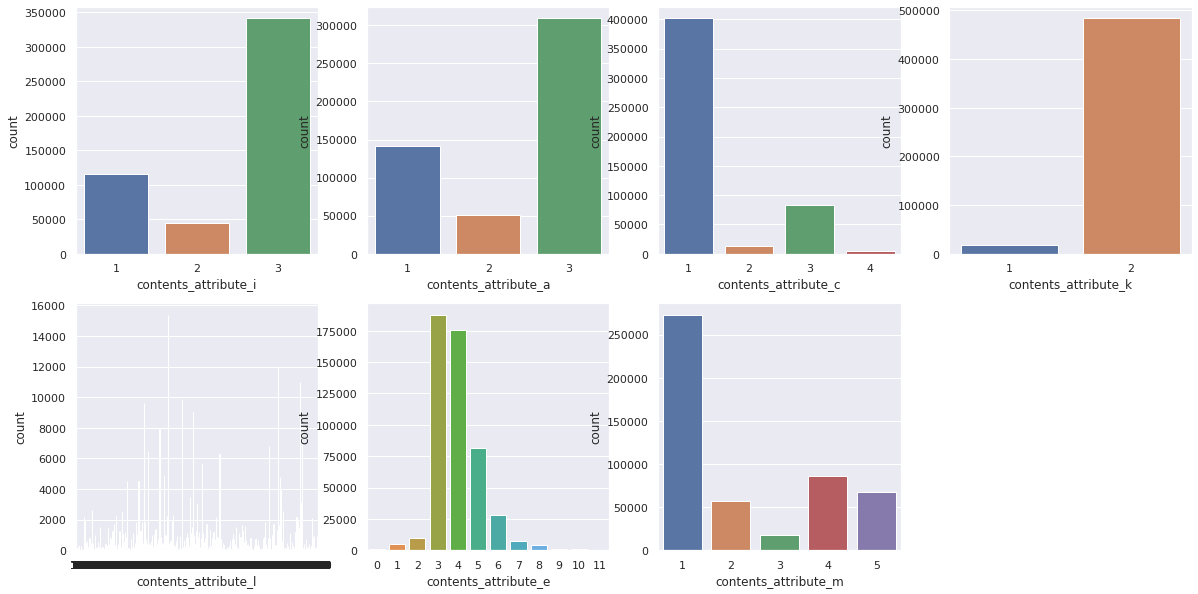

In [321]:
#하위속성 없는 col들의 countplot > i,a,c,k,l,m,e
plt.figure(figsize=(20,10))

plt.subplot(241)
sns.countplot(data=train_data, x= 'contents_attribute_i')

plt.subplot(242)
sns.countplot(data=train_data, x= 'contents_attribute_a')

plt.subplot(243)
sns.countplot(data=train_data, x= 'contents_attribute_c')

plt.subplot(244)
sns.countplot(data=train_data, x= 'contents_attribute_k')

plt.subplot(245)
sns.countplot(data=train_data, x= 'contents_attribute_l')

plt.subplot(246)
sns.countplot(data=train_data, x= 'contents_attribute_e')

plt.subplot(247)
sns.countplot(data=train_data, x= 'contents_attribute_m')


In [322]:
print(train_data.contents_attribute_c.value_counts())
print('contents_attribute_c는 5개 문항이 있었지만 4개의 문항만 표시')

1    401409
3     82929
2     12459
4      5154
Name: contents_attribute_c, dtype: int64
contents_attribute_c는 5개 문항이 있었지만 4개의 문항만 표시


> 속성값이 많은 l 제외하고 target이랑 같이 plotting

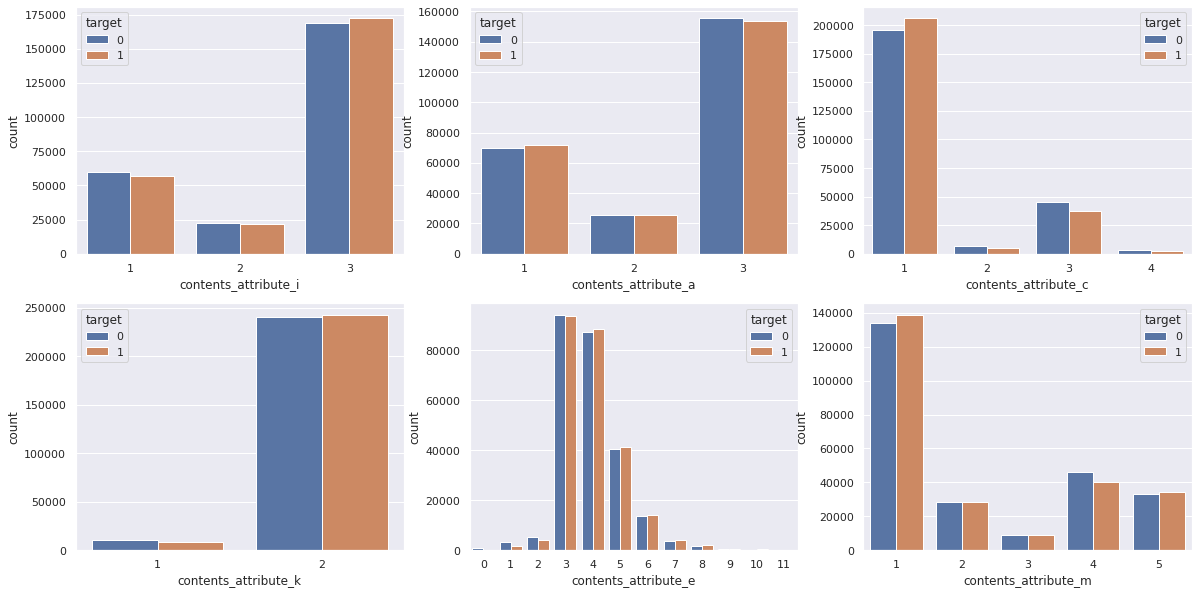

In [323]:
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(data=train_data, x= 'contents_attribute_i',hue='target')

plt.subplot(232)
sns.countplot(data=train_data, x= 'contents_attribute_a',hue='target')

plt.subplot(233)
sns.countplot(data=train_data, x= 'contents_attribute_c',hue='target')

plt.subplot(234)
sns.countplot(data=train_data, x= 'contents_attribute_k',hue='target')

plt.subplot(235)
sns.countplot(data=train_data, x= 'contents_attribute_e',hue='target')

plt.subplot(236)
sns.countplot(data=train_data, x= 'contents_attribute_m',hue='target')


- 각 값별 0,1 분포가 비슷해 보인다

나머지 하위속성 있는 값들의 분포 찍어보기

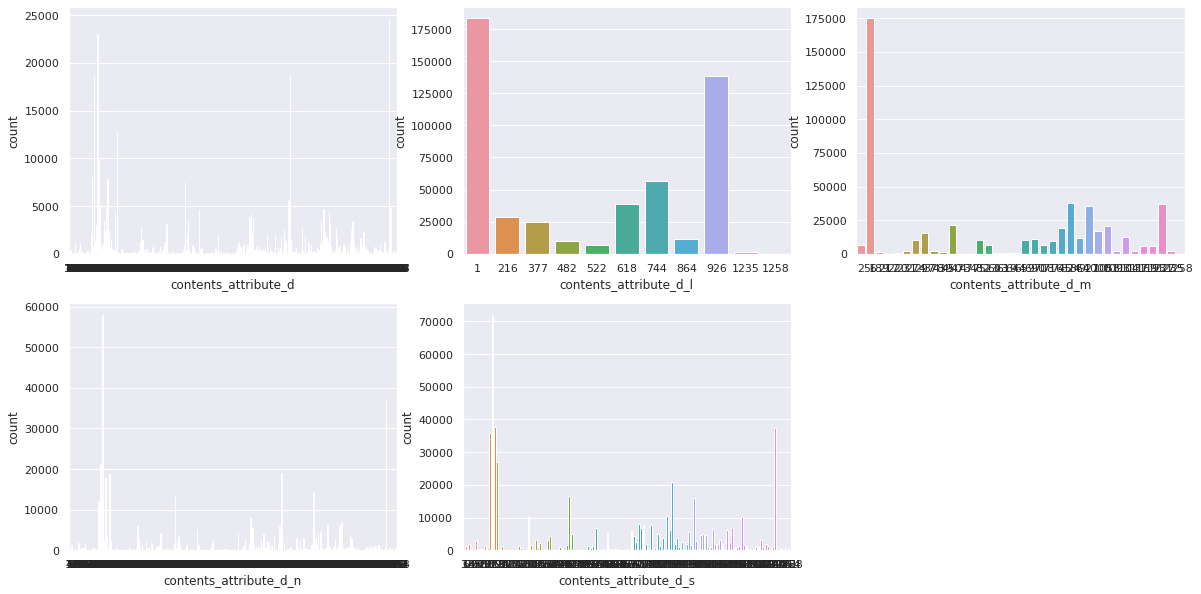

In [324]:
#d, j, h
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(data=train_data, x= 'contents_attribute_d')

plt.subplot(232)
sns.countplot(data=train_data, x= 'contents_attribute_d_l')

plt.subplot(233)
sns.countplot(data=train_data, x= 'contents_attribute_d_m')

plt.subplot(234)
sns.countplot(data=train_data, x= 'contents_attribute_d_n')

plt.subplot(235)
sns.countplot(data=train_data, x= 'contents_attribute_d_s')



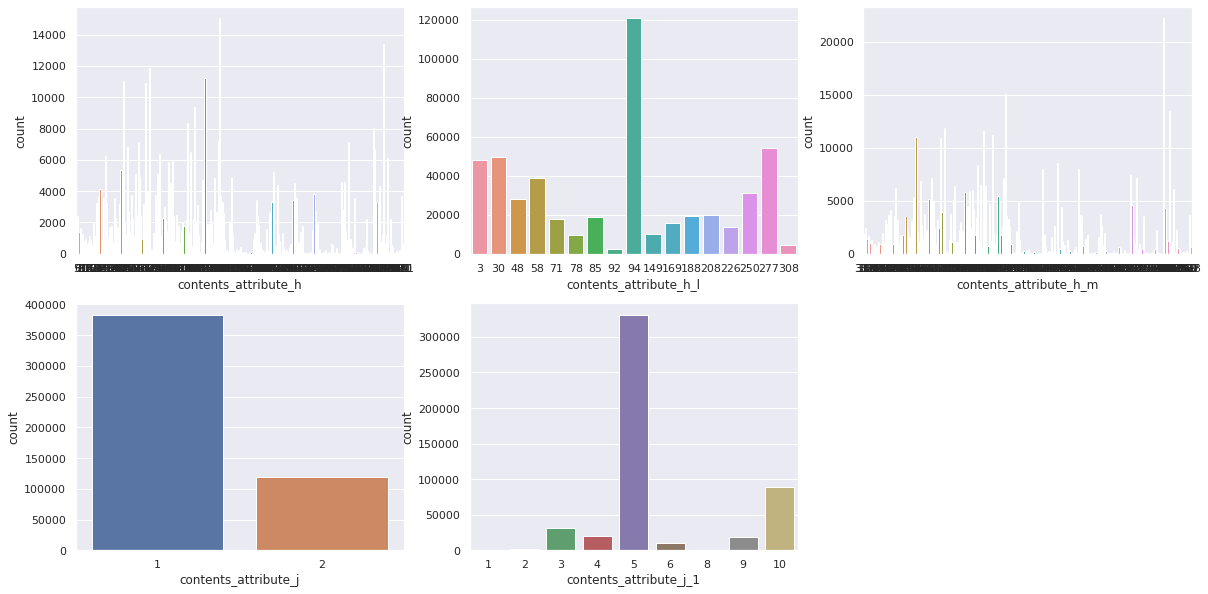

In [325]:
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(data=train_data, x= 'contents_attribute_h')

plt.subplot(232)
sns.countplot(data=train_data, x= 'contents_attribute_h_l')

plt.subplot(233)
sns.countplot(data=train_data, x= 'contents_attribute_h_m')

plt.subplot(234)
sns.countplot(data=train_data, x='contents_attribute_j')

plt.subplot(235)
sns.countplot(data=train_data, x='contents_attribute_j_1')

In [326]:
train_data.contents_attribute_j_1.value_counts()
# 1~10중에 7은 없음

5     330790
10     89307
3      30664
4      19649
9      19115
6      10808
2       1416
8        137
1         65
Name: contents_attribute_j_1, dtype: int64

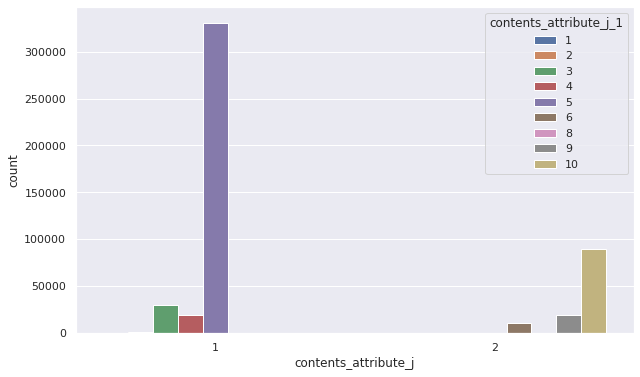

In [327]:
#j만 다시 나눠서 보기
plt.figure(figsize=(10,6))

sns.countplot(data=train_data, x='contents_attribute_j',hue='contents_attribute_j_1')

> j를 보면 j가 1일때와 2일 때 j_1의 val이 다른것을 확인

In [328]:
cont_j= train_data[['contents_attribute_j','contents_attribute_j_1']]

cont_j_1= cont_j[cont_j.contents_attribute_j==1]
cont_j_2= cont_j[cont_j.contents_attribute_j==2]

In [329]:
print('콘텐츠 속성 j가 1인경우의 j_1 \n', cont_j_1.value_counts())
print('콘텐츠 속성 j가 2인경우의 j_1 \n', cont_j_2.value_counts())

콘텐츠 속성 j가 1인경우의 j_1 
 contents_attribute_j  contents_attribute_j_1
1                     5                         330790
                      3                          30664
                      4                          19649
                      2                           1416
                      1                             65
dtype: int64
콘텐츠 속성 j가 2인경우의 j_1 
 contents_attribute_j  contents_attribute_j_1
2                     10                        89307
                      9                         19115
                      6                         10808
                      8                           137
dtype: int64


> j=1    >    j_1 =1,2,3,4,5

> j=2    >    j_1= 6,8,9,10

#나머지 columns

> 사용자 번호 : person_rn

> 콘텐츠 번호 : contents_rn

> 컨텐츠 열람 일시 : contents_open_dt > converted 

In [330]:
print(train_data.person_rn.min())
print(train_data.person_rn.max())

7
1049005


In [331]:
print('사용자 번호 Value Count \n')
print(train_data.person_rn.value_counts().sort_values(ascending=False))

#한 명의 사용자가 여러 번 이용한 건가?

사용자 번호 Value Count 

627445     20
827703     19
241140     19
1047079    19
53891      18
           ..
174272      1
606397      1
608444      1
618683      1
356799      1
Name: person_rn, Length: 300177, dtype: int64


In [332]:
# 같은 사용자는 늘 같은 value일까?
train_data[train_data.person_rn==627445]
#person관련된 col의 value는 동일한 것으로 확인. 제공된 컨텐츠의 속성에 따라 사용 여부 다름

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
3319,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,3,3,5,1,1,2,1151,756,5,4,108,627445,414363,1,369,368,297,216,968,961,927,926,962,961,927,926,748,747,745,744,94,398,3,316,58,368,94,402,2,13,2,3,32
4843,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,3,2,5,1,3,2,361,978,2,5,139,627445,357354,0,369,368,297,216,968,961,927,926,962,961,927,926,968,961,927,926,94,398,3,316,58,368,94,422,2,9,21,58,11
5752,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,3,3,5,1,1,2,749,95,2,3,139,627445,358408,1,369,368,297,216,968,961,927,926,962,961,927,926,92,91,56,1,94,398,3,316,58,368,94,422,2,19,12,47,33
16588,0,0,0,0,0,0,1,6,2,5,372,978,966,7,95,4,59,3,3,5,1,1,2,702,750,5,4,22,627445,107394,1,369,368,297,216,968,961,927,926,962,961,927,926,748,747,745,744,94,398,3,316,58,368,3,334,2,19,1,6,53
19979,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,1,3,5,1,1,2,1805,38,1,4,127,627445,425267,1,369,368,297,216,968,961,927,926,962,961,927,926,38,37,2,1,94,398,3,316,58,368,94,413,2,14,11,53,53
52916,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,3,1,5,1,1,2,572,978,1,6,128,627445,415662,1,369,368,297,216,968,961,927,926,962,961,927,926,968,961,927,926,94,398,3,316,58,368,94,414,2,26,21,54,32
94001,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,1,3,5,1,1,2,975,768,1,4,107,627445,415479,1,369,368,297,216,968,961,927,926,962,961,927,926,765,747,745,744,94,398,3,316,58,368,94,402,2,19,22,11,57
117891,0,0,0,0,0,0,1,6,2,5,372,978,966,7,95,4,59,3,3,5,1,1,2,654,748,4,4,22,627445,64968,1,369,368,297,216,968,961,927,926,962,961,927,926,748,747,745,744,94,398,3,316,58,368,3,334,2,14,18,50,17
124206,0,0,0,1,0,0,1,6,2,5,372,978,966,7,95,4,59,3,1,10,2,1,2,757,978,1,4,109,627445,400244,0,369,368,297,216,968,961,927,926,962,961,927,926,968,961,927,926,94,398,3,316,58,368,94,403,2,10,16,12,55
129379,0,0,0,0,0,0,1,6,2,5,372,978,966,7,95,4,59,3,1,10,2,1,2,693,46,2,10,43,627445,107568,0,369,368,297,216,968,961,927,926,962,961,927,926,46,43,2,1,94,398,3,316,58,368,30,354,2,20,22,14,48


300177


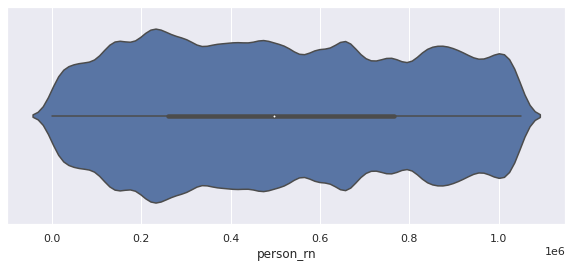

In [333]:
#person_rn
print(len(train_data.person_rn.unique()))
plt.figure(figsize=(10,4))
sns.violinplot(train_data.person_rn)

> contents_rn

In [334]:
train_data.contents_rn.describe()

count    501951.000000
mean     337674.345074
std      219518.485557
min          20.000000
25%      140899.000000
50%      304996.000000
75%      535184.000000
max      753628.000000
Name: contents_rn, dtype: float64

In [335]:
print('contents_rn unique 값 : ',len(train_data.contents_rn.unique()))

contents_rn unique 값 :  283359


In [336]:
train_data.contents_rn.value_counts().sort_values(ascending=False)

22078     39
76824     36
138209    32
72025     29
402922    28
          ..
607974     1
110331     1
183330     1
261809     1
21227      1
Name: contents_rn, Length: 283359, dtype: int64

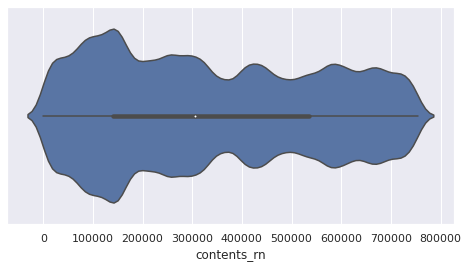

In [337]:
plt.figure(figsize=(8,4))
sns.violinplot(train_data.contents_rn)

In [338]:
train_data[train_data.contents_rn==22078]

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
120004,1,1,1,0,0,0,1,3,2,5,703,705,704,4,113,4,21,2,3,5,1,3,2,1681,703,3,4,26,619187,22078,1,703,703,690,618,703,703,690,618,703,703,690,618,703,703,690,618,94,404,3,316,3,333,3,338,7,22,8,39,13
197073,1,1,1,1,0,0,1,0,4,3,703,705,704,4,4,95,59,2,3,5,1,3,2,1681,703,3,4,26,63459,22078,1,703,703,690,618,703,703,690,618,703,703,690,618,703,703,690,618,3,316,94,398,58,368,3,338,9,4,16,3,26
197074,1,1,0,1,0,0,1,2,4,5,705,784,102,0,4,7,59,2,3,5,1,3,2,1681,703,3,4,26,43955,22078,1,703,703,690,618,784,783,745,744,101,91,56,1,703,703,690,618,3,316,3,319,58,368,3,338,7,23,12,20,9
197075,0,0,0,0,0,0,2,0,4,5,857,772,707,4,106,22,128,2,3,5,1,3,2,1681,703,3,4,26,636435,22078,1,854,853,824,744,765,747,745,744,703,703,690,618,703,703,690,618,94,402,3,334,94,414,3,338,9,11,14,41,37
197076,1,1,0,0,0,0,2,0,4,1,704,705,703,3,125,124,2,2,3,5,1,3,2,1681,703,3,4,26,699027,22078,1,703,703,690,618,703,703,690,618,703,703,690,618,703,703,690,618,94,411,94,410,1,315,3,338,8,4,18,59,17
207726,1,1,0,1,0,0,1,4,2,5,705,703,840,4,4,95,59,2,3,5,1,3,2,1681,703,3,4,26,5138,22078,0,703,703,690,618,703,703,690,618,840,831,824,744,703,703,690,618,3,316,94,398,58,368,3,338,8,31,17,10,20
207728,1,1,0,1,0,0,2,0,4,2,705,703,840,4,4,95,59,2,3,5,1,3,2,1681,703,3,4,26,89818,22078,1,703,703,690,618,703,703,690,618,840,831,824,744,703,703,690,618,3,316,94,398,58,368,3,338,7,21,19,17,9
207729,1,0,0,1,0,0,1,1,5,5,696,840,695,5,4,95,59,2,3,5,1,3,2,1681,703,3,4,26,108598,22078,1,694,691,690,618,840,831,824,744,694,691,690,618,703,703,690,618,3,316,94,398,58,368,3,338,7,25,23,27,24
258230,1,0,0,1,0,0,2,0,2,1,641,703,738,3,4,148,59,2,3,5,1,3,2,1681,703,3,4,26,94582,22078,1,641,636,619,618,703,703,690,618,738,735,716,618,703,703,690,618,3,316,94,431,58,368,3,338,9,11,17,35,30
258231,0,0,0,1,0,0,2,6,4,1,461,698,144,4,4,95,59,2,3,5,1,3,2,1681,703,3,4,26,113008,22078,1,461,451,450,377,697,691,690,618,136,123,56,1,703,703,690,618,3,316,94,398,58,368,3,338,7,22,10,8,1


> person_rn val이 같으면 person관련된 val 다 동일

> contents_rn val이 같으면 contents 관련된 val 다 동일


In [339]:
target_1= train_data[train_data.target==1]
target_0= train_data[train_data.target==0]
print('target=1인 경우 사용된 컨텐츠 번호')
print(target_1.contents_rn.value_counts().sort_values(ascending=False))
print('-------------------------------------------------------')
print('target=0인 경우 사용된 컨텐츠 번호')
print(target_0.contents_rn.value_counts().sort_values(ascending=False))

target=1인 경우 사용된 컨텐츠 번호
22078     34
138209    28
76824     26
402922    23
668672    21
          ..
602491     1
306624     1
346484     1
618867     1
300319     1
Name: contents_rn, Length: 155277, dtype: int64
-------------------------------------------------------
target=0인 경우 사용된 컨텐츠 번호
105913    12
135857    11
78623     10
76824     10
80966     10
          ..
436148     1
335557     1
149416     1
625691     1
570420     1
Name: contents_rn, Length: 188515, dtype: int64


> 콘텐츠 열람 시간에 따라 target에 유의한 차이가 있을까?

In [340]:
time_df=train_data[['contents_open_dt_month', 'contents_open_dt_day',
       'contents_open_dt_hour', 'contents_open_dt_minute',
       'contents_open_dt_sec','target']]

time_df.head()

,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec,target
0,1,17,12,9,36,1
1,6,18,17,48,52,0
2,7,8,20,0,10,0
3,1,13,18,9,34,0
4,3,9,20,39,22,0


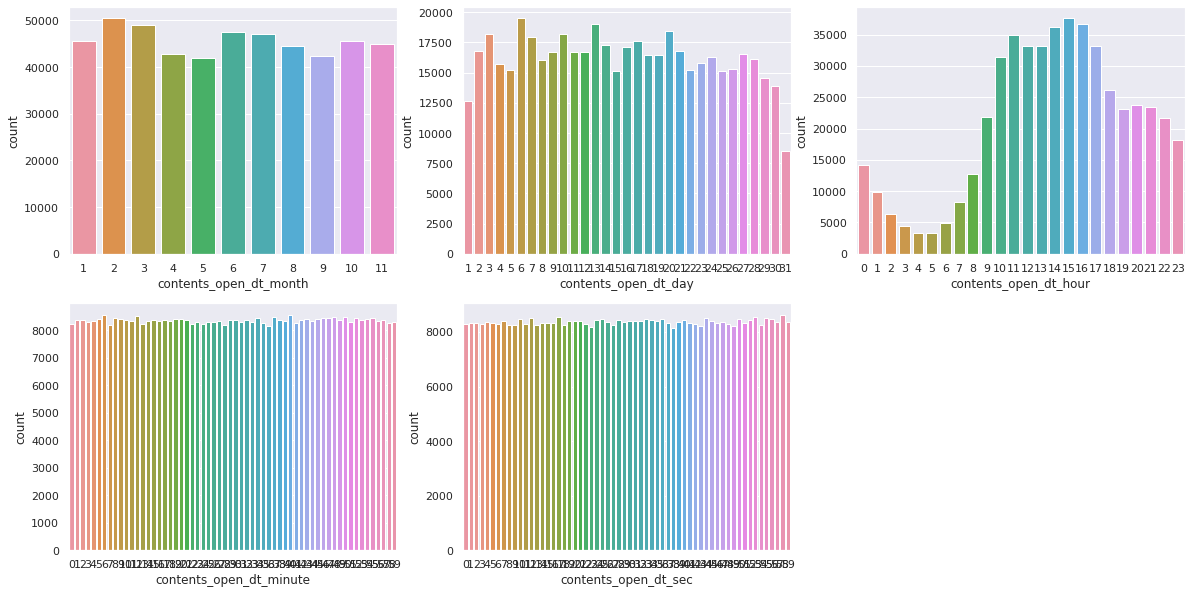

In [341]:
#시각화
plt.figure(figsize=(20,10))

plt.subplot(231)
sns.countplot(data=time_df, x='contents_open_dt_month')

plt.subplot(232)
sns.countplot(data=time_df, x='contents_open_dt_day')

plt.subplot(233)
sns.countplot(data=time_df, x='contents_open_dt_hour')

plt.subplot(234)
sns.countplot(data=time_df, x='contents_open_dt_minute')

plt.subplot(235)
sns.countplot(data=time_df, x='contents_open_dt_sec')

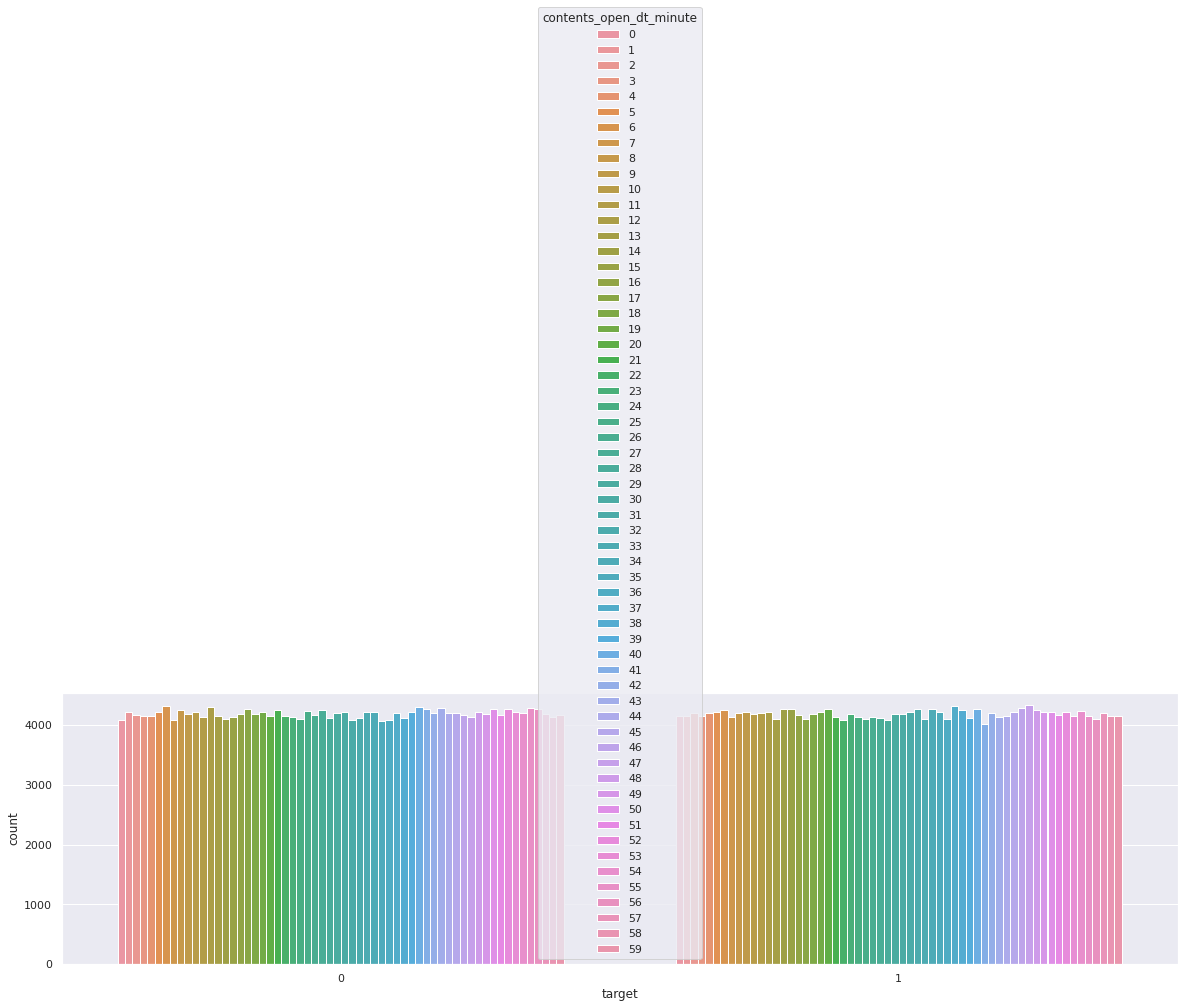

In [342]:
plt.figure(figsize=(20,5))
sns.countplot(data=time_df, x= 'target', hue= 'contents_open_dt_minute')

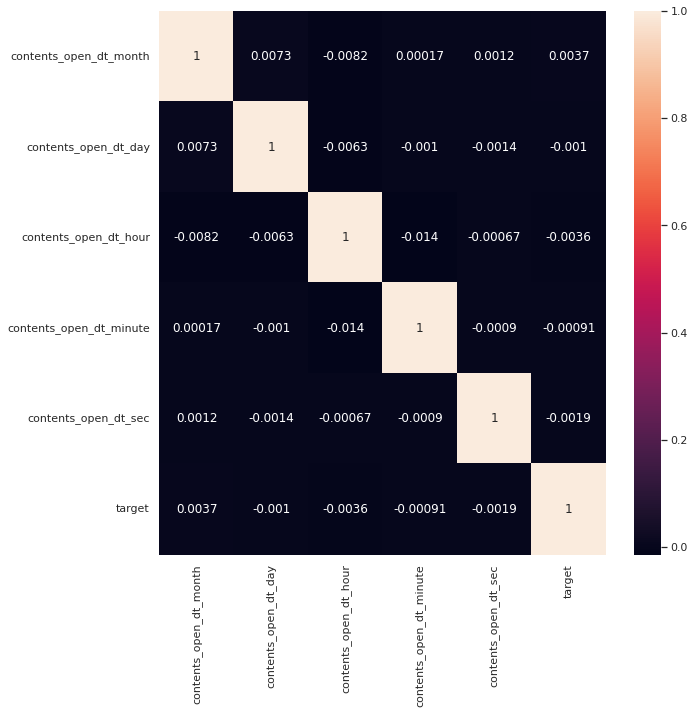

In [343]:
plt.figure(figsize=(10,10))
sns.heatmap(time_df.corr(),annot=True)